In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path, PurePath

if Path('../data').exists():
    data_directory = PurePath("../data")
    print(data_directory)
    
if Path('../visuals').exists():
    viz_directory = PurePath("../visuals")
    print(viz_directory)


..\data
..\visuals


In [2]:
checkout = pd.read_csv(f"{data_directory}/benchmark_results_test.csv")
checkout["NumberOfElements"] = 2**checkout["2^N"]

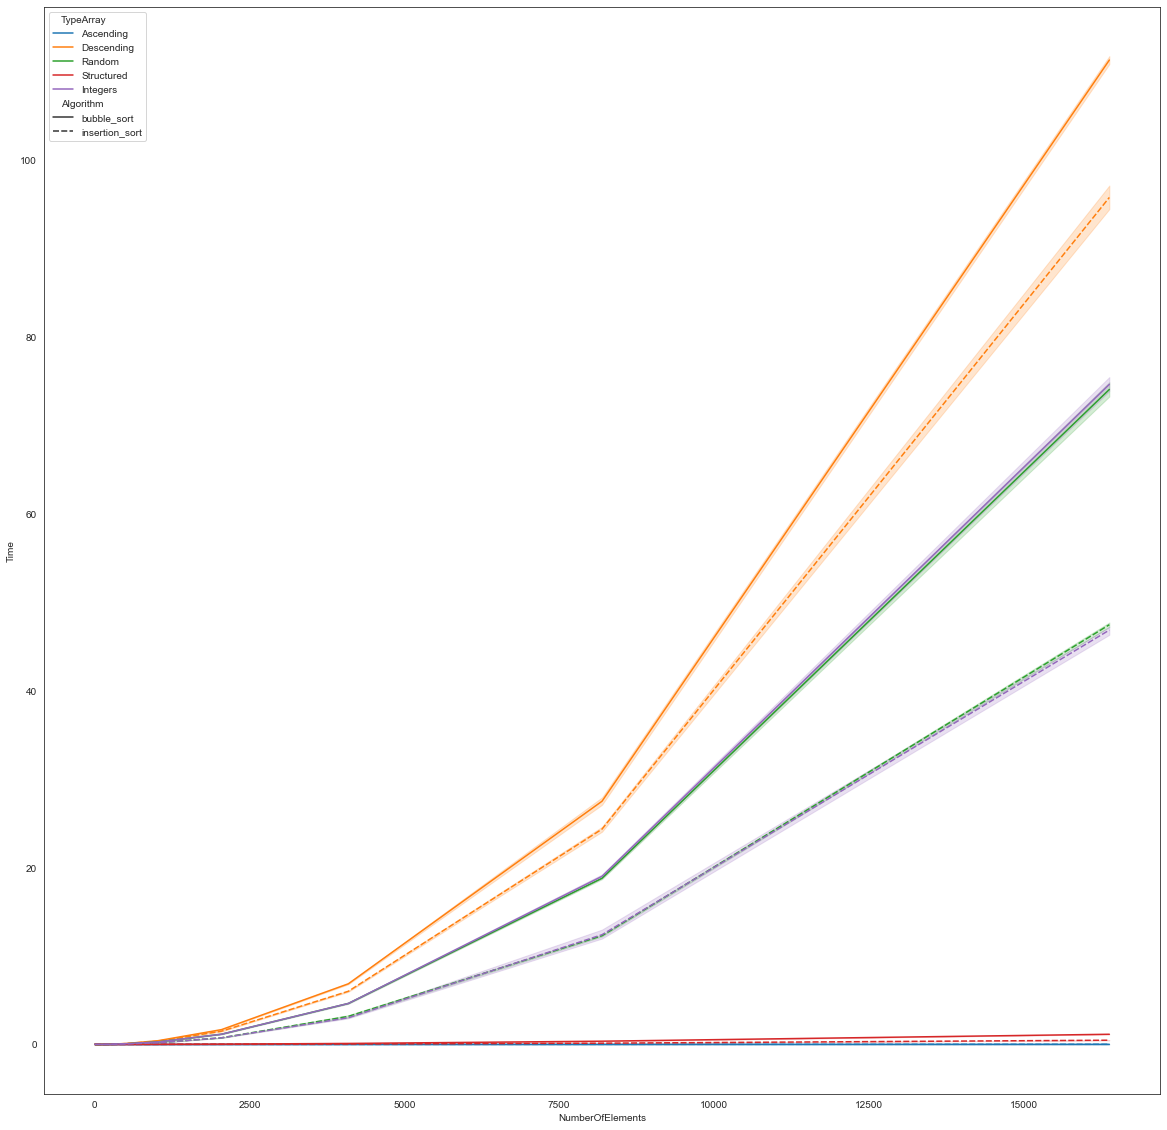

In [6]:
plt.figure(figsize=(20, 20))
sns.set_style("white")
sns.lineplot(
    data=checkout[(checkout["Algorithm"] == "insertion_sort") | (checkout["Algorithm"] == "bubble_sort")], 
    x="NumberOfElements", y="Time", hue="TypeArray", style="Algorithm")
plt.savefig(f"{viz_directory}/foo.pdf", bbox_inches='tight', transparent=True)
plt.show()


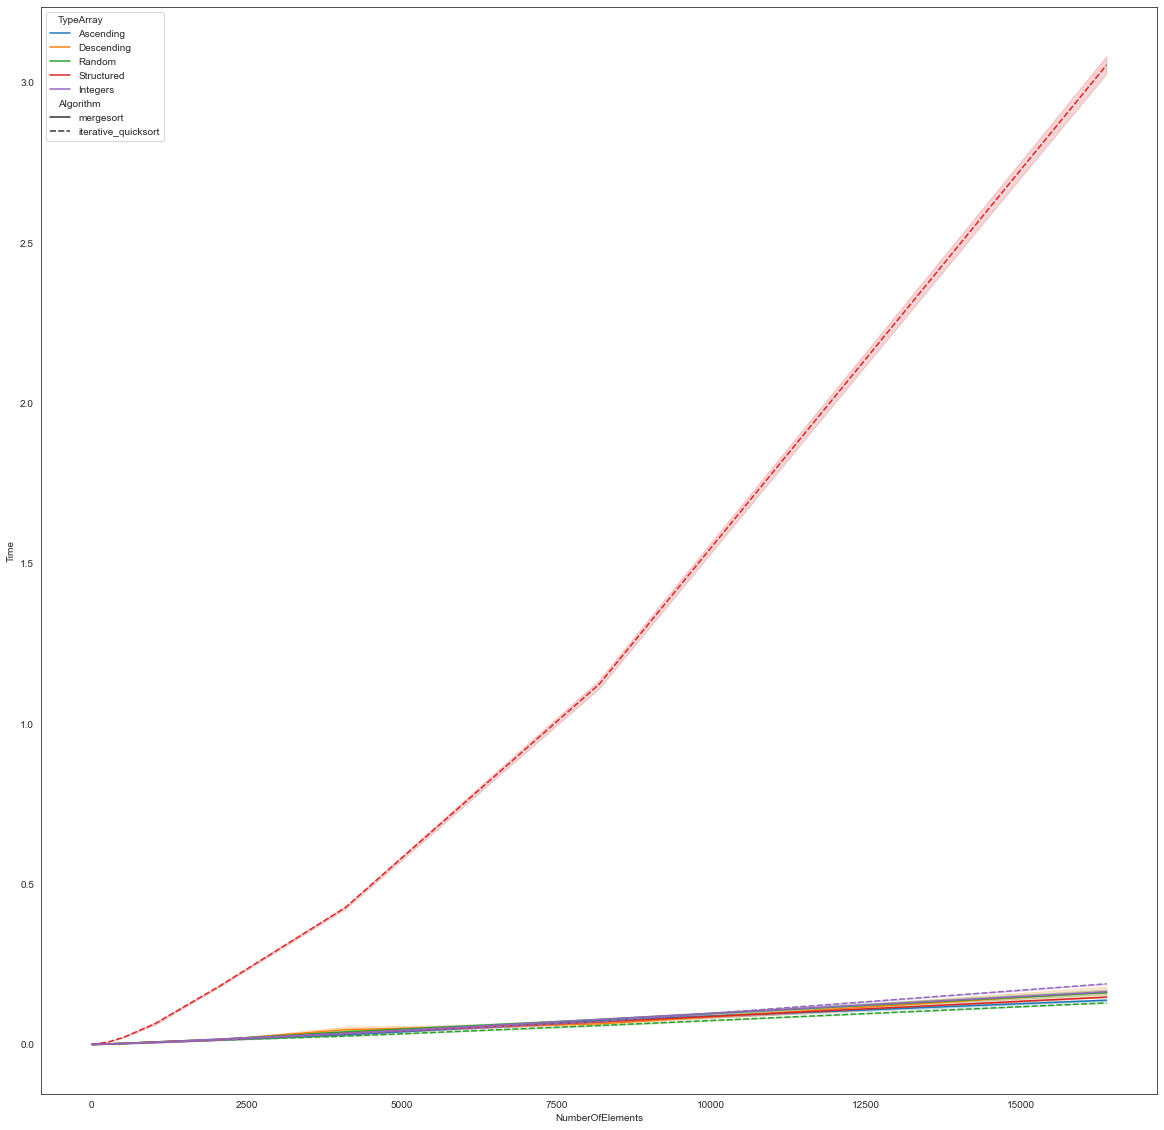

In [12]:
plt.figure(figsize=(20, 20))
sns.set_style("white")
sns.lineplot(
    data=checkout[((checkout["Algorithm"] == "iterative_quicksort") & ((checkout['TypeArray']!='Ascending') &(checkout['TypeArray']!='Descending')) )| (checkout["Algorithm"] == "mergesort")], 
    x="NumberOfElements", y="Time", hue="TypeArray", style="Algorithm")
plt.savefig(f"{viz_directory}/subquad.pdf", bbox_inches='tight', transparent=True)
plt.show()

In [27]:
checkout

,Algorithm,TypeArray,Time,2^N
0,bubble_sort,Ascending,0.000005,1.0
1,bubble_sort,Ascending,0.000002,1.0
2,bubble_sort,Ascending,0.000006,1.0
3,bubble_sort,Ascending,0.000001,1.0
4,bubble_sort,Ascending,0.000001,1.0
...,...,...,...,...
1745,mergesort_combined,Integers,0.138484,14.0
1746,mergesort_combined,Integers,0.135306,14.0
1747,mergesort_combined,Integers,0.135982,14.0
1748,mergesort_combined,Integers,0.136209,14.0
